# Handwritten Digits Classifier

Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, consists of pre-processing handwritten images then feeding to a neural network model.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import load_digits
from sklearn.exceptions import ConvergenceWarning


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [2]:
#import dataset
digits=load_digits(as_frame=True)
digits=digits.frame

digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


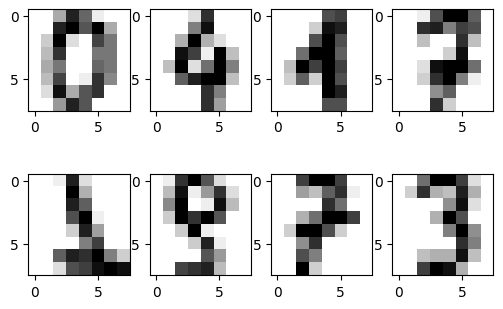

In [3]:
#display images using matplotlib
images=[0, 100, 200, 300,  1000, 1100, 1200, 1300]

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4)
axs=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
counter=0
for i in range(8):
    
    temp_image = digits.iloc[images[i]]
    temp_image = temp_image.drop('target')
    np_image = temp_image.values
    np_image = np_image.reshape(8,8)
    
    axs[i].imshow(np_image, cmap='gray_r')

plt.show()

## K nearest neighbours 

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [5]:

train=digits.sample(frac=0.8)
test_index=~digits.isin(train)
test=digits[test_index]

print(train.info())
print('---------------------------------------------------------------')
print(test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1438 entries, 960 to 1059
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1438 non-null   float64
 1   pixel_0_1  1438 non-null   float64
 2   pixel_0_2  1438 non-null   float64
 3   pixel_0_3  1438 non-null   float64
 4   pixel_0_4  1438 non-null   float64
 5   pixel_0_5  1438 non-null   float64
 6   pixel_0_6  1438 non-null   float64
 7   pixel_0_7  1438 non-null   float64
 8   pixel_1_0  1438 non-null   float64
 9   pixel_1_1  1438 non-null   float64
 10  pixel_1_2  1438 non-null   float64
 11  pixel_1_3  1438 non-null   float64
 12  pixel_1_4  1438 non-null   float64
 13  pixel_1_5  1438 non-null   float64
 14  pixel_1_6  1438 non-null   float64
 15  pixel_1_7  1438 non-null   float64
 16  pixel_2_0  1438 non-null   float64
 17  pixel_2_1  1438 non-null   float64
 18  pixel_2_2  1438 non-null   float64
 19  pixel_2_3  1438 non-null   float64
 20  pixel_

In [6]:
#pipeline for testing and training KNN models
def model_train(train_df, features, target, model):
    """
    Fits a machine learning model on the train dataset
    
    Args:
        train_df: Training dataset
        features: Predictors to be used
        target: Target variable to predict
        model: Machine learning model to use
        
    Returns:
        none
    """
    model.fit(train_df[features], train_df[target])
    
def model_test(test_df, train_df, features, target, model):
    """
    Tests a machine learning model on the test and train datasets
    
    Args:
        test_df: Test dataset
        train_df: Training dataset
        features: Predictors to be used
        target: Target variable to predict
        model: Machine learning model to use
        
    Returns:
        test_accuracy: Accuracy score for the given model on the test dataset
        train_accuracy: Accuracy score for the given model on the train dataset
    """
    test_predictions = model.predict(test_df[features])
    test_accuracy = accuracy_score(test_df[target], test_predictions)
    
    train_predictions = model.predict(train_df[features])
    train_accuracy = accuracy_score(train_df[target], train_predictions)
    
    return test_accuracy, train_accuracy


@ignore_warnings(category=ConvergenceWarning)
def cross_validate(df, features, target, model, splits=4):
    kf = KFold(n_splits=splits)
    train_accuracies=[]
    test_accuracies=[]
    for train_index, test_index in kf.split(df):
        train_df, test_df = df.iloc[train_index].copy(), df.iloc[test_index].copy()
        
        model_train(train_df, features, target, model)

        test_acc, train_acc=model_test(test_df, train_df, features, target, model)
        
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
    
    return (np.mean(train_accuracies), np.mean(test_accuracies))
        


In [7]:
features=digits.drop('target', axis=1).columns
target='target'

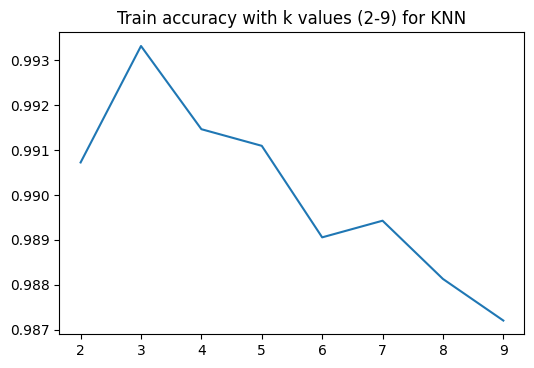

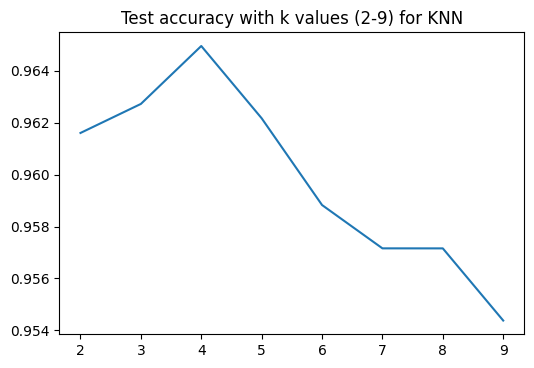

In [8]:
x=np.arange(2,10)
test=[]
train=[]
for n in range(2, 10):
    knn= KNeighborsClassifier(n_neighbors=n)
    tr, te = cross_validate(digits, features, target, knn)
    test.append(te)
    train.append(tr)

plt.plot(x,train)
plt.title('Train accuracy with k values (2-9) for KNN')
plt.show()

plt.plot(x,test)
plt.title('Test accuracy with k values (2-9) for KNN')
plt.show()

## Neural Network Model: One hidden layer

In [9]:
from sklearn.neural_network import MLPClassifier


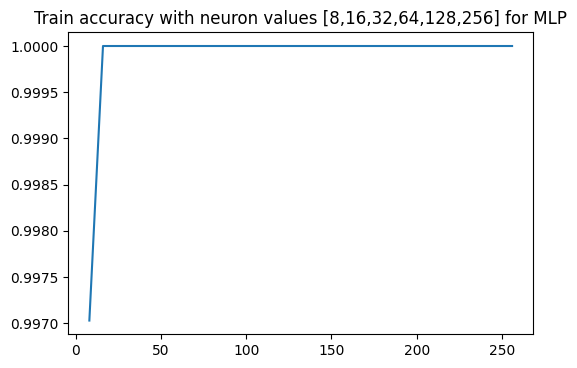

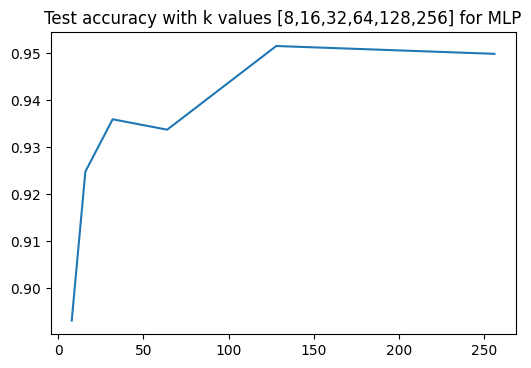

In [10]:

neurons=[2**(n+3) for n in range(6)]

test_neural=[]
train_neural=[]
for n in neurons:
    mlp= MLPClassifier(hidden_layer_sizes=(n,), max_iter=500)
    tr, te = cross_validate(digits, features, target, mlp)
    test_neural.append(te)
    train_neural.append(tr)

plt.plot(neurons,train_neural)
plt.title('Train accuracy with neuron values [8,16,32,64,128,256] for MLP')
plt.show()

plt.plot(neurons,test_neural)
plt.title('Test accuracy with k values [8,16,32,64,128,256] for MLP')
plt.show()

Adding more neurons to a single hidden layer vastly improved the classification accuracy. 64 neurons seems to be optimal. However, there is evidence of significant overfitting for all neural network.

## Neural Networks with 2 hidden layers

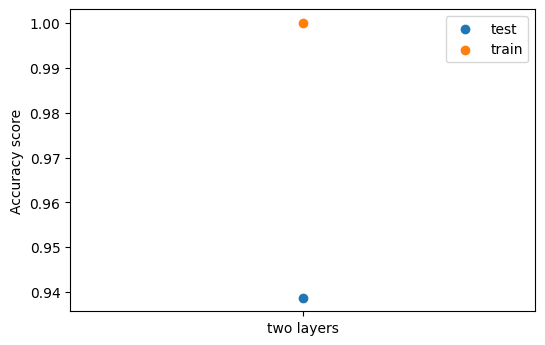

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 64))
train_accuracy, test_accuracy = cross_validate(digits,
                                               features,
                                               target,
                                               mlp)

# Plot the results
plt.scatter("two layers", test_accuracy)
plt.scatter("two layers", train_accuracy)
plt.legend(["test", "train"])
plt.ylabel("Accuracy score")
plt.show()

To avoid overfitting, let us increase the number of folds when cross validating to 6 when we test with 3 hidden layers

## Neural Networks with 3 hidden layers

In [12]:
neuron_3=[10,64]
train_3=[]
test_3=[]
for n in neuron_3:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n))
    train_accuracy, test_accuracy = cross_validate(digits,
                                                   features,
                                                   target,
                                                   mlp, 
                                                  splits=6)
    train_3.append(train_accuracy)
    test_3.append(test_accuracy)



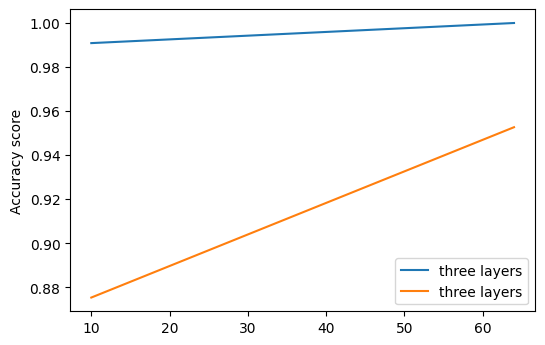

In [13]:
# Plot the results
plt.plot(neuron_3, train_3, label="three layers")
plt.plot(neuron_3, test_3, label="three layers")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()